#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

In [24]:
Telecom_data = pd.read_excel(r"C:\Users\Admin\Desktop\telcom_data.xlsx")

User Overiew Analysis

Sub-task 1: Identify the top 10 handsets used by the customers

In [26]:
top_10_handsets = Telecom_data['Handset Type'].value_counts(ascending = False).head(10)
top_10_handsets = pd.DataFrame(top_10_handsets)
top_10_handsets

count
Handset Type                       
Huawei B528S-23A              19752
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
Apple iPhone Se (A1723)        5187
Apple iPhone 8 (A1905)         4993
Apple iPhone Xr (A2105)        4568
Samsung Galaxy S8 (Sm-G950F)   4520
Apple iPhone X (A1901)         3813

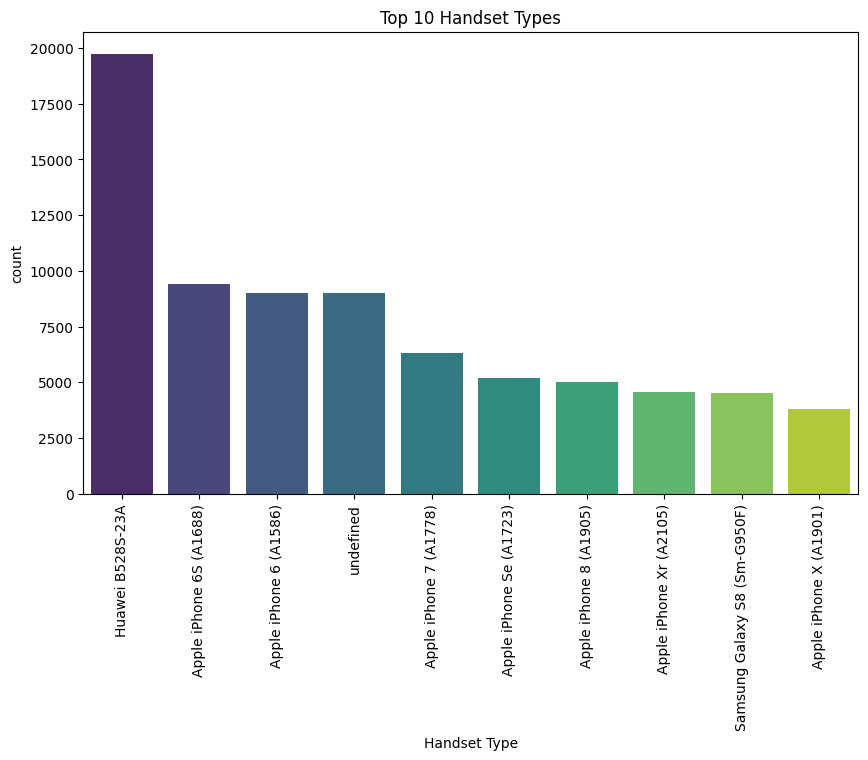

In [28]:
# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.index, y='count', data=top_10_handsets, palette='viridis')

# Customize the plot
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Sub-task 2: Identify the top 3 handset manufacturers

In [32]:
top_3_handsets_Manufacturers = Telecom_data['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_handsets_Manufacturers = pd.DataFrame(top_3_handsets_Manufacturers)
top_3_handsets_Manufacturers

count
Handset Manufacturer       
Apple                 59565
Samsung               40839
Huawei                34423

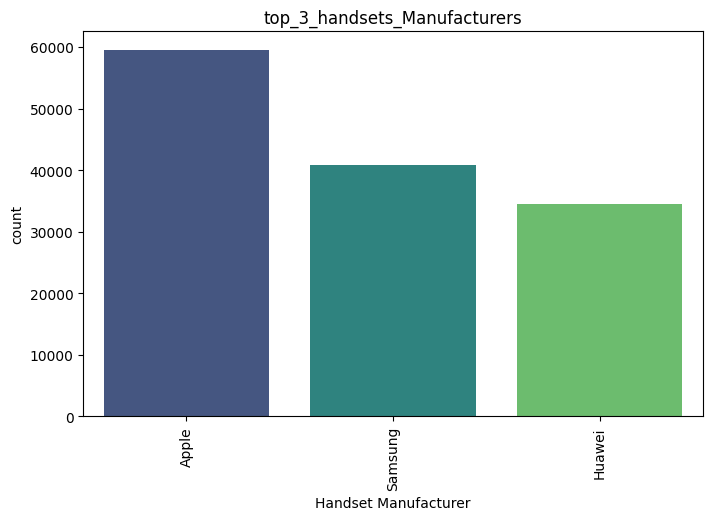

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x= top_3_handsets_Manufacturers.index, y = 'count',data=top_3_handsets_Manufacturers, palette='viridis')
# Customize the plot
plt.title('top_3_handsets_Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Sub-task 3: Identify the top 5 handsets per top 3 handset manufacturers

In [36]:
for manufacturer in top_3_handsets_Manufacturers.index:
    top_5_handsets_per_manufacturer = Telecom_data[Telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_5_handsets_per_manufacturer)
    print("\n")

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64




Sub-task 4: Make a short interpretation and recommendation to marketing teams

In [ ]:
interpretation = """
Interpretation:
1. The top 10 handsets used by customers have been identified, indicating the most popular devices.
2. The top 3 handset manufacturers are determined, providing insights into market dominance.
3. The top 5 handsets per top 3 manufacturers offer a detailed view of popular devices from key manufacturers.

Recommendation to Marketing Teams:
Based on the analysis, marketing teams can focus on promoting and optimizing services for the top handsets and manufacturers.
Consider partnerships or special promotions with the top manufacturers to leverage their market presence.
Tailor advertising strategies for popular applications identified in xDR data sessions, such as Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.
"""

print("Interpretation and Recommendation:")
print(interpretation)

Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.

● Aggregate per user the following information in the column

In [38]:
def aggregate_per_user(Telecom_data):

    columns_to_show = ['Dur. (ms)', 'Total UL (Bytes)', 
                   'Total DL (Bytes)', ]

    return Telecom_data.groupby(['Bearer Id'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max,])

aggregate_per_user(Telecom_data)

Dur. (ms)                 Total UL (Bytes)  \
                               mean     min     max             mean   
Bearer Id                                                              
6917537518543529984    24534.000000   24534   24534     4.170461e+07   
6917537604825860096    21489.000000   21489   21489     3.869360e+07   
6917537608536819712    27786.000000   27786   27786     1.554893e+07   
6917537633966310400    15635.000000   15635   15635     4.960569e+07   
6917537638622189568    24264.000000   24264   24264     2.198346e+07   
...                             ...     ...     ...              ...   
13186541164985800704  145291.000000  145291  145291     3.618959e+07   
13186541166737199104   86399.000000   86399   86399     3.591946e+07   
13186541166776899584   86399.000000   86399   86399     4.087768e+07   
13186541167134199808  103113.000000  103113  103113     4.614756e+07   
                       50815.926337    7212  470053     4.094147e+07   

                                         Total DL (Bytes)               \
                           min       max             mean          min   
Bearer Id                                                                
6917537518543529984   41704610  41704610     5.007220e+08  500721999.0   
6917537604825860096   38693596  38693596     7.095493e+08  709549265.0   
6917537608536819712   15548926  15548926     8.544659e+08  854465860.0   
6917537633966310400   49605688  49605688     8.257865e+08  825786510.0   
6917537638622189568   21983463  21983463     6.249578e+08  624957763.0   
...                        ...       ...              ...          ...   
13186541164985800704  36189587  36189587     3.870016e+08  387001634.0   
13186541166737199104  35919460  35919460     8.726888e+08  872688792.0   
13186541166776899584  40877676  40877676     3.863551e+08  386355068.0   
13186541167134199808  46147558  46147558     3.272128e+08  327212841.0   
                       7732426  70590714     4.477868e+08   25592436.0   

                                   
                              max  
Bearer Id                          
6917537518543529984   500721999.0  
6917537604825860096   709549265.0  
6917537608536819712   854465860.0  
6917537633966310400   825786510.0  
6917537638622189568   624957763.0  
...                           ...  
13186541164985800704  387001634.0  
13186541166737199104  872688792.0  
13186541166776899584  386355068.0  
13186541167134199808  327212841.0  
                      883431445.0  

[134709 rows x 9 columns]

Number of xDR sessions

In [40]:
xdr_sess = Telecom_data[['Bearer Id', 'MSISDN/Number']]
a = xdr_sess.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

xdr sessions
MSISDN/Number              
33601001722               1
33601001754               1
33601002511               1
33601007832               1
33601008617               2

Text(0.5, 1.0, 'Users with highest session numbers')

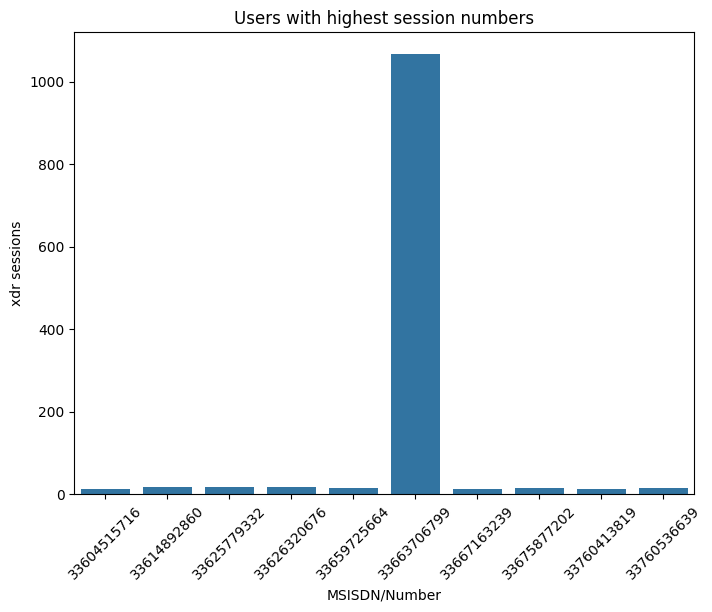

In [42]:
t = a.sort_values(by = 'xdr sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xdr sessions'])
plt.xticks(rotation = 45)
plt.title('Users with highest session numbers')

2.Session duration

In [44]:
Session_duration = Telecom_data[['Dur. (ms)', 'MSISDN/Number']]
b = Session_duration.groupby('MSISDN/Number').sum()
b.columns = ['sess_duration (ms)']
b.head()

sess_duration (ms)
MSISDN/Number                    
33601001722                116720
33601001754                181230
33601002511                134969
33601007832                 49878
33601008617                 37104

Text(0.5, 1.0, 'Users with longest session duration')

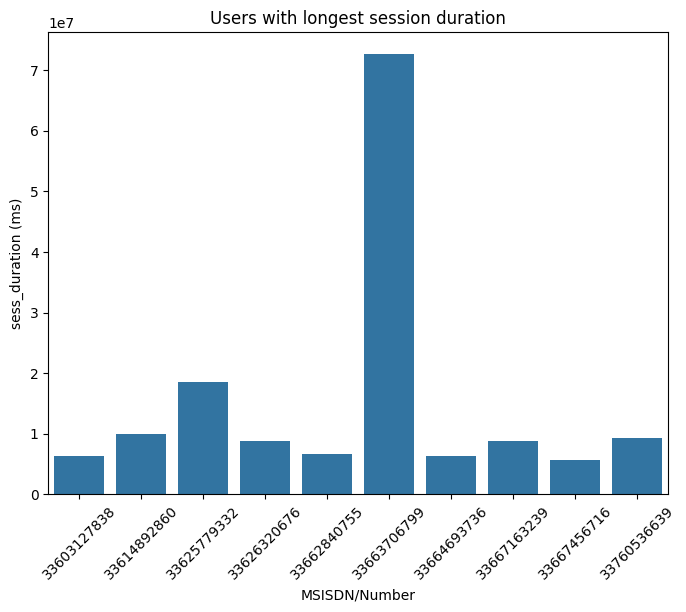

In [46]:
t = b.sort_values(by = 'sess_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['sess_duration (ms)'])
plt.xticks(rotation = 45)
plt.title('Users with longest session duration')

3. The total download (DL) and upload (UL) data

In [48]:
byte = Telecom_data[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

Total UL (Bytes)  Total DL (Bytes)
MSISDN/Number                                    
33601001722            36053108      8.426375e+08
33601001754            36104459      1.207552e+08
33601002511            39306820      5.566597e+08
33601007832            20327526      4.019932e+08
33601008617            94280527      1.363130e+09

In [50]:
# Ensure the required columns are present
required_columns = ['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']
if not all(column in Telecom_data.columns for column in required_columns):
    print("Required columns are missing in the dataset.")


# Calculate total bytes and group by 'MSISDN/Number'
Telecom_data['Total_bytes'] = Telecom_data['Total UL (Bytes)'] + Telecom_data['Total DL (Bytes)']
total_bytes_grouped = Telecom_data.groupby('MSISDN/Number')['Total_bytes'].sum()

# Display the result
print(total_bytes_grouped.head())

MSISDN/Number
33601001722    8.786906e+08
33601001754    1.568596e+08
33601002511    5.959665e+08
33601007832    4.223207e+08
33601008617    1.457411e+09
Name: Total_bytes, dtype: float64


In [52]:
# Ensure the 'Total DL (Bytes)' and 'Total UL (Bytes)' columns are present
required_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']
if not all(column in Telecom_data.columns for column in required_columns):
    print("Required columns are missing in the dataset.")
  

# Calculate total download (DL) and upload (UL) data
total_dl = Telecom_data['Total DL (Bytes)'].sum()
total_ul = Telecom_data['Total UL (Bytes)'].sum()

print(f'Total Download Data: {total_dl} Bytes')
print(f'Total Upload Data: {total_ul} Bytes')

Total Download Data: 68196970352922.5 Bytes
Total Upload Data: 6168222087128 Bytes


In [54]:
# Calculating 'Total UL (Bytes)' and 'Total DL (Bytes)' columns
Telecom_data['total_bytes'] = Telecom_data['Total UL (Bytes)'] + Telecom_data['Total DL (Bytes)']

# using the column in analysis
byte = Telecom_data[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

Total UL (Bytes)  Total DL (Bytes)   total_bytes
MSISDN/Number                                                  
33601001722            36053108      8.426375e+08  8.786906e+08
33601001754            36104459      1.207552e+08  1.568596e+08
33601002511            39306820      5.566597e+08  5.959665e+08
33601007832            20327526      4.019932e+08  4.223207e+08
33601008617            94280527      1.363130e+09  1.457411e+09

Text(0.5, 1.0, 'A sample of users upload, download and total bytes')

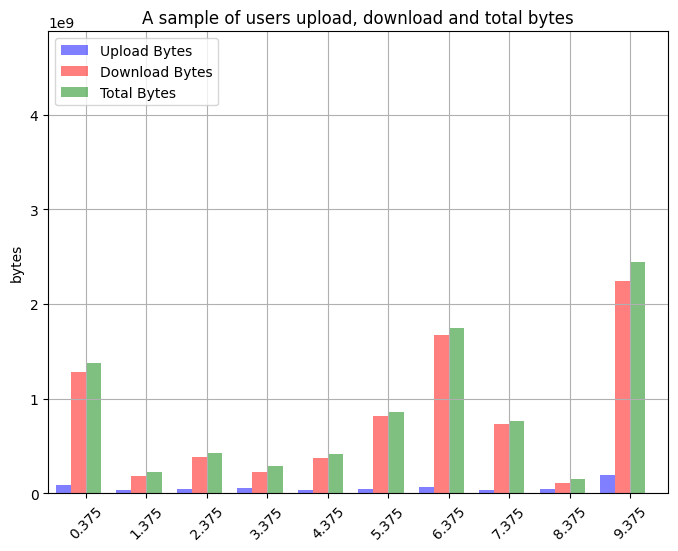

In [56]:
# plotting a sample of the data
t = c.sample(10)
pos = list(range(len(t['Total UL (Bytes)'])))
width = 0.25
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos, t['Total UL (Bytes)'], width, alpha=0.5, color='b')
plt.bar([p + width for p in pos], t['Total DL (Bytes)'], width, alpha=0.5, color='r')
plt.bar([p + width*2 for p in pos], t['total_bytes'], width, alpha=0.5, color='g')
ax.set_ylabel('bytes')
ax.set_title('Bytes data per user')
ax.set_xticks([p + 1.5 * width for p in pos])
plt.xticks(rotation = 45)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(t['Total UL (Bytes)'] + t['Total DL (Bytes)'] + t['total_bytes'])] )
plt.legend(['Upload Bytes', 'Download Bytes', 'Total Bytes'], loc='upper left')
plt.grid()
plt.title('A sample of users upload, download and total bytes')

Note:-Upload bytes are less than download bytes throughout

4.The total data volume (in Bytes) during this session for each application

In [58]:
byte = Telecom_data[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

Total UL (Bytes)  Total DL (Bytes)   total_bytes
MSISDN/Number                                                  
33601001722            36053108      8.426375e+08  8.786906e+08
33601001754            36104459      1.207552e+08  1.568596e+08
33601002511            39306820      5.566597e+08  5.959665e+08
33601007832            20327526      4.019932e+08  4.223207e+08
33601008617            94280527      1.363130e+09  1.457411e+09

Task 1.2 - Conduct exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.

Handling Missing Values

PreProcessing

Numerical, Categorical and TimeStamp features

In [60]:
numerical = []
categorical = []
timestamps = []

for col in Telecom_data.columns:
    if Telecom_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif Telecom_data[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
df1 = Telecom_data[features]
df1.head(3)

Start ms  End ms  Dur. (ms)             IMSI  MSISDN/Number  \
0       770     662    1823652  208201448079117    33664962239   
1       235     606    1365104  208201909211140    33681854413   
2         1     652    1361762  208200314458056    33760627129   

             IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0  35521209507511               42                5                       23   
1  35794009006359               65                5                       16   
2  35281510359387               45                5                        6   

   Avg Bearer TP UL (kbps)  ...  Total UL (Bytes)  Total DL (Bytes)  \
0                       44  ...          36749741       308879636.0   
1                       26  ...          53800391       653384965.0   
2                        9  ...          27883638       279807335.0   

   Total_bytes  total_bytes             Bearer Id  Last Location Name  \
0  345629377.0  345629377.0  13114483460844900352    9164566995485190   
1  707185356.0  707185356.0  13114483482878900224             L77566A   
2  307690973.0  307690973.0  13114483484080500736             D42335A   

   Handset Manufacturer                 Handset Type               Start  \
0               Samsung   Samsung Galaxy A5 Sm-A520F 2019-04-04 12:01:18   
1               Samsung  Samsung Galaxy J5 (Sm-J530) 2019-04-09 13:04:04   
2               Samsung     Samsung Galaxy A8 (2018) 2019-04-09 17:42:11   

                  End  
0 2019-04-25 14:35:31  
1 2019-04-25 08:15:48  
2 2019-04-25 11:58:13  

[3 rows x 57 columns]

In [92]:
# Drop missing values in identification columns
identification_columns = ['IMSI', 'MSISDN/Number', 'IMEI']
df1 = Telecom_data.dropna(subset=identification_columns)
Telecom_data = df1

In [94]:
# defining the fix_missing_ffill function
def fix_missing_ffill(Telecom_data, column):
    Telecom_data[column].fillna(method='ffill', inplace=True)
    return Telecom_data

In [96]:
# DataFrame called 'clean_df'
percentage_metrics_columns = ['DL TP < 50 Kbps (%)', 'UL TP > 300 Kbps (%)']
for col in percentage_metrics_columns:
    Telecom_data = fix_missing_ffill(Telecom_data, col)

In [98]:
# Display the resulting DataFrame
Telecom_data.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18       770 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04       235 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11         1 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25       486 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23       565 2019-04-25 10:40:32   

   End ms  Dur. (ms)             IMSI  MSISDN/Number            IMEI  \
0     662    1823652  208201448079117    33664962239  35521209507511   
1     606    1365104  208201909211140    33681854413  35794009006359   
2     652    1361762  208200314458056    33760627129  35281510359387   
3     171    1321509  208201402342131    33750343200  35356610164913   
4     954    1089009  208201401415120    33699795932  35407009745539   

  Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0   9164566995485190  ...           8198936.0           9656251.0   
1            L77566A  ...          18338413.0          17227132.0   
2            D42335A  ...          17587794.0           6163408.0   
3            T21824A  ...          13994646.0           1097942.0   
4            D88865A  ...          17124581.0            415218.0   

   Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0        278082303.0         14344150.0       171744450.0         8814393.0   
1        608750074.0          1170709.0       526904238.0        15055145.0   
2        229584621.0           395630.0       410692588.0         4215763.0   
3        799538153.0         10849722.0       749039933.0        12797283.0   
4        527707248.0          3529801.0       550709500.0        13910322.0   

   Total UL (Bytes)  Total DL (Bytes)  Total_bytes  total_bytes  
0          36749741       308879636.0  345629377.0  345629377.0  
1          53800391       653384965.0  707185356.0  707185356.0  
2          27883638       279807335.0  307690973.0  307690973.0  
3          43324218       846028530.0  889352748.0  889352748.0  
4          38542814       569138589.0  607681403.0  607681403.0  

[5 rows x 57 columns]

In [100]:
# Impute missing values in general download/upload columns using mean
general_columns = ['Total UL (Bytes)', 'Total DL (Bytes)']
for col in general_columns:
    Telecom_data[col] = Telecom_data[col].fillna(Telecom_data[col].mean())

Telecom_data[col]

0         308879636.0
1         653384965.0
2         279807335.0
3         846028530.0
4         569138589.0
             ...     
149996    574175259.0
149997    666648844.0
149998    592786405.0
149999    371895920.0
150000    455841077.5
Name: Total DL (Bytes), Length: 150001, dtype: float64

In [102]:
dispersion_params = Telecom_data.select_dtypes(include=['float64', 'int64']).agg(['mean', 'std', 'var', 'min', 'max'])
print(dispersion_params)

          Start ms        End ms     Dur. (ms)          IMSI  MSISDN/Number  \
mean    499.188199    498.800888  1.046084e+05  2.082016e+14   4.182441e+10   
std     288.610872    288.096693  8.103736e+04  2.144723e+10   2.438731e+12   
var   83296.235554  82999.704454  6.567055e+09  4.599835e+20   5.947411e+24   
min       0.000000      0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
max     999.000000    999.000000  1.859336e+06  2.140743e+14   8.823971e+14   

              IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
mean  4.842592e+13        97.774455        15.315031             1.329996e+04   
std   2.238739e+13       559.909444        76.687998             2.397182e+04   
var   5.011953e+26    313498.585409      5881.048988             5.746483e+08   
min   4.400152e+11         0.000000         0.000000             0.000000e+00   
max   9.900120e+13     96923.000000      7120.000000             3.781600e+05   

      Avg Bearer TP UL (kbps)  ...  Ne

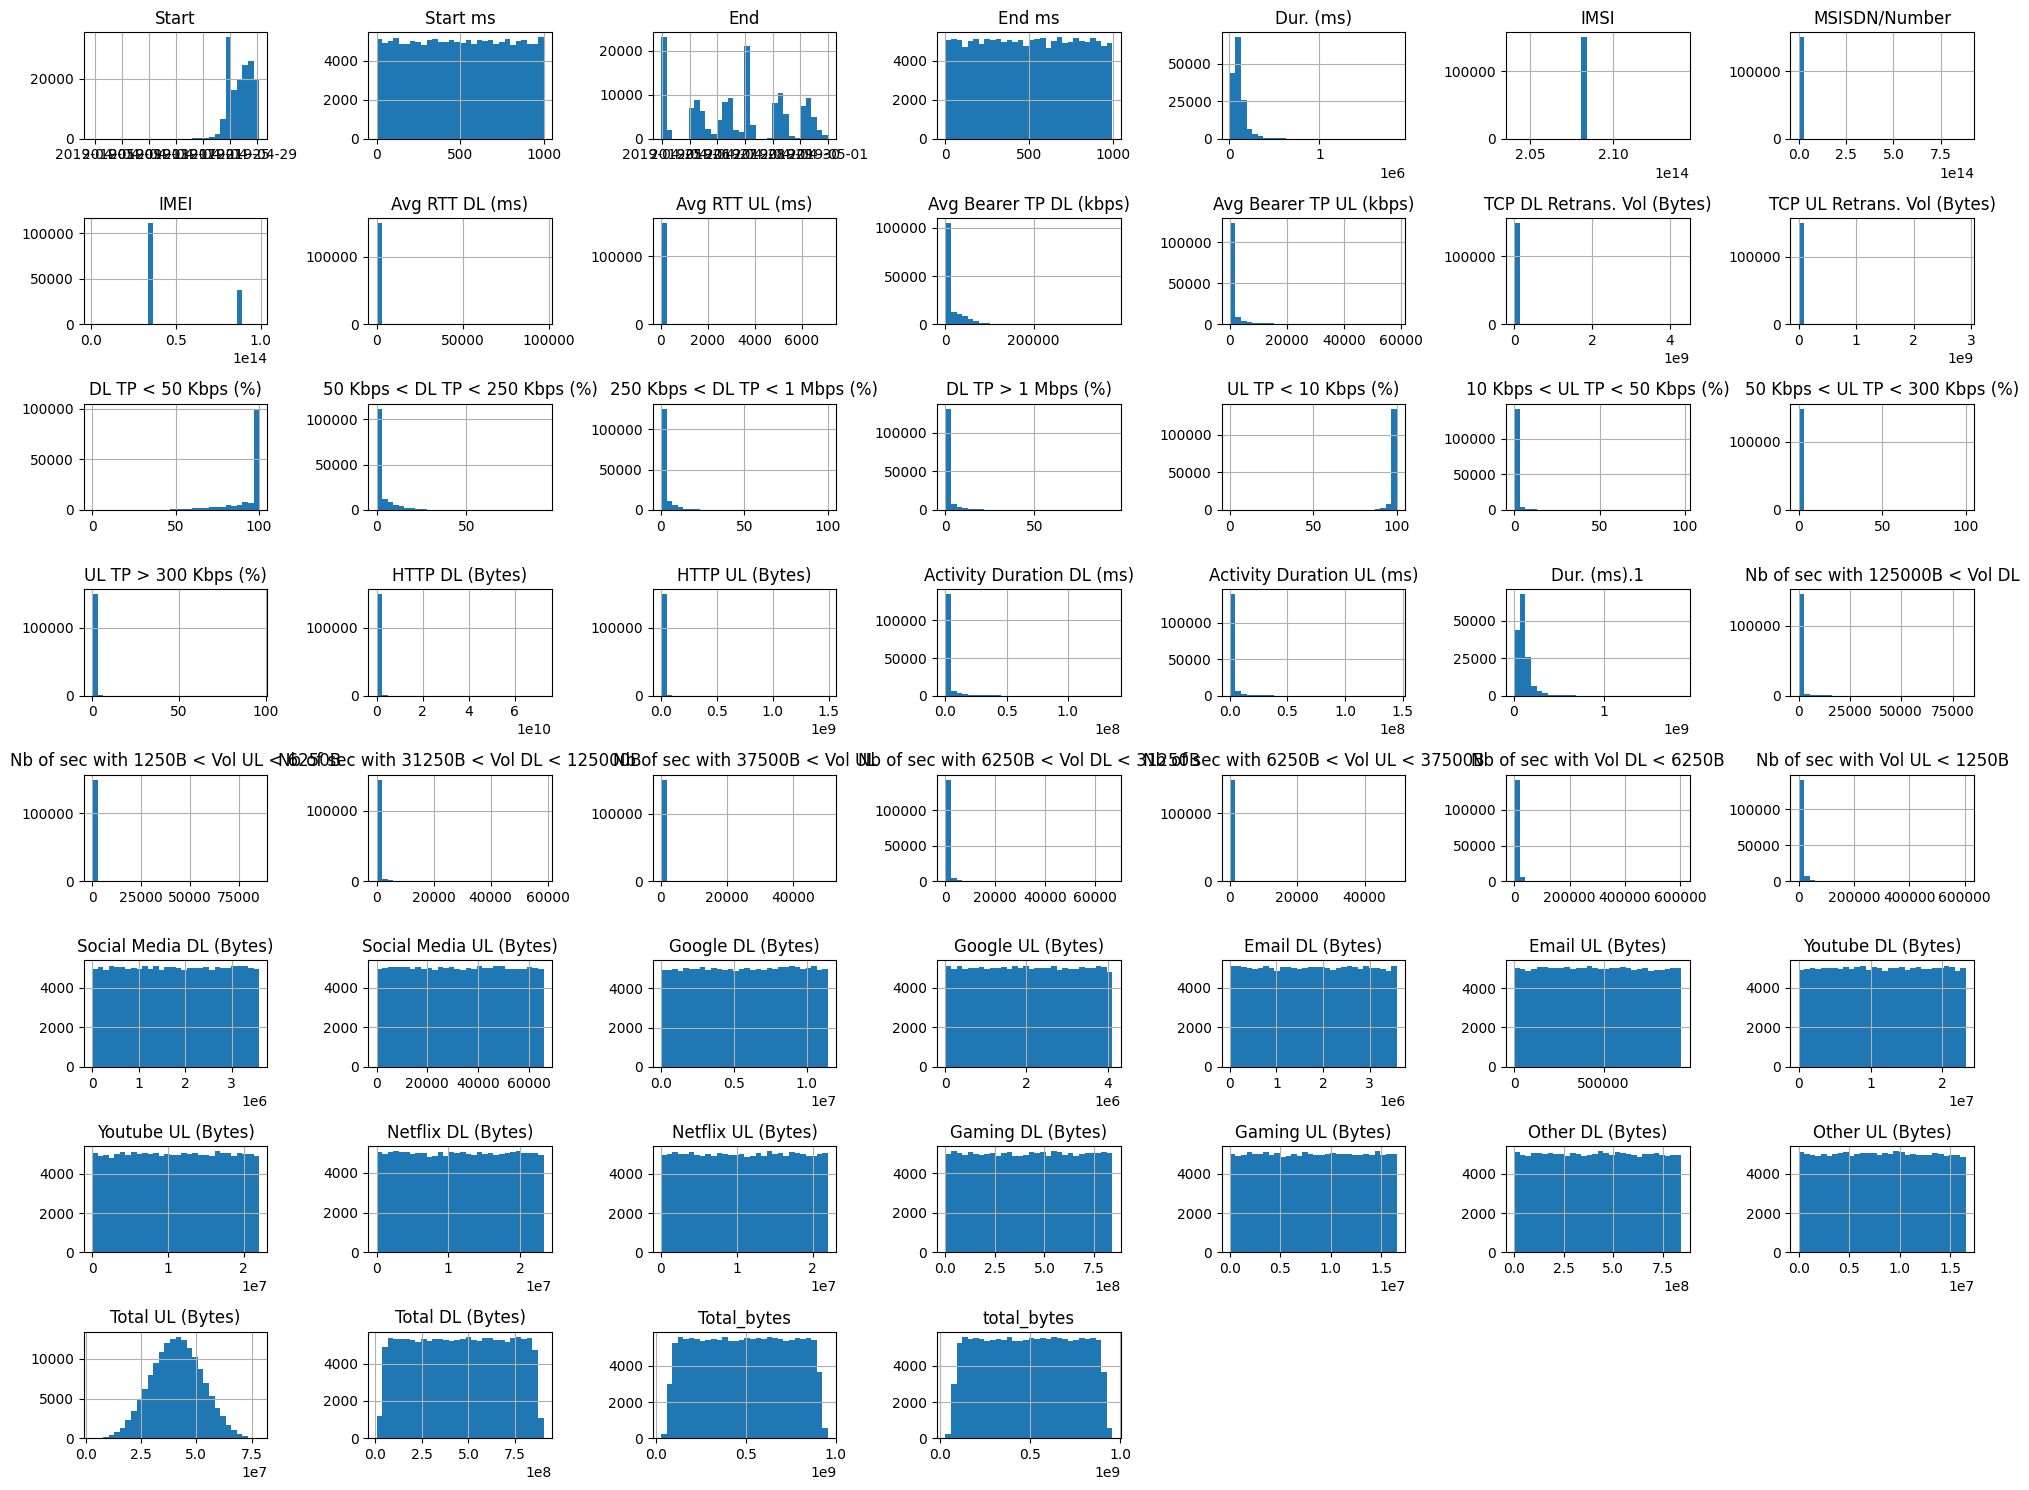

In [106]:
Telecom_data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

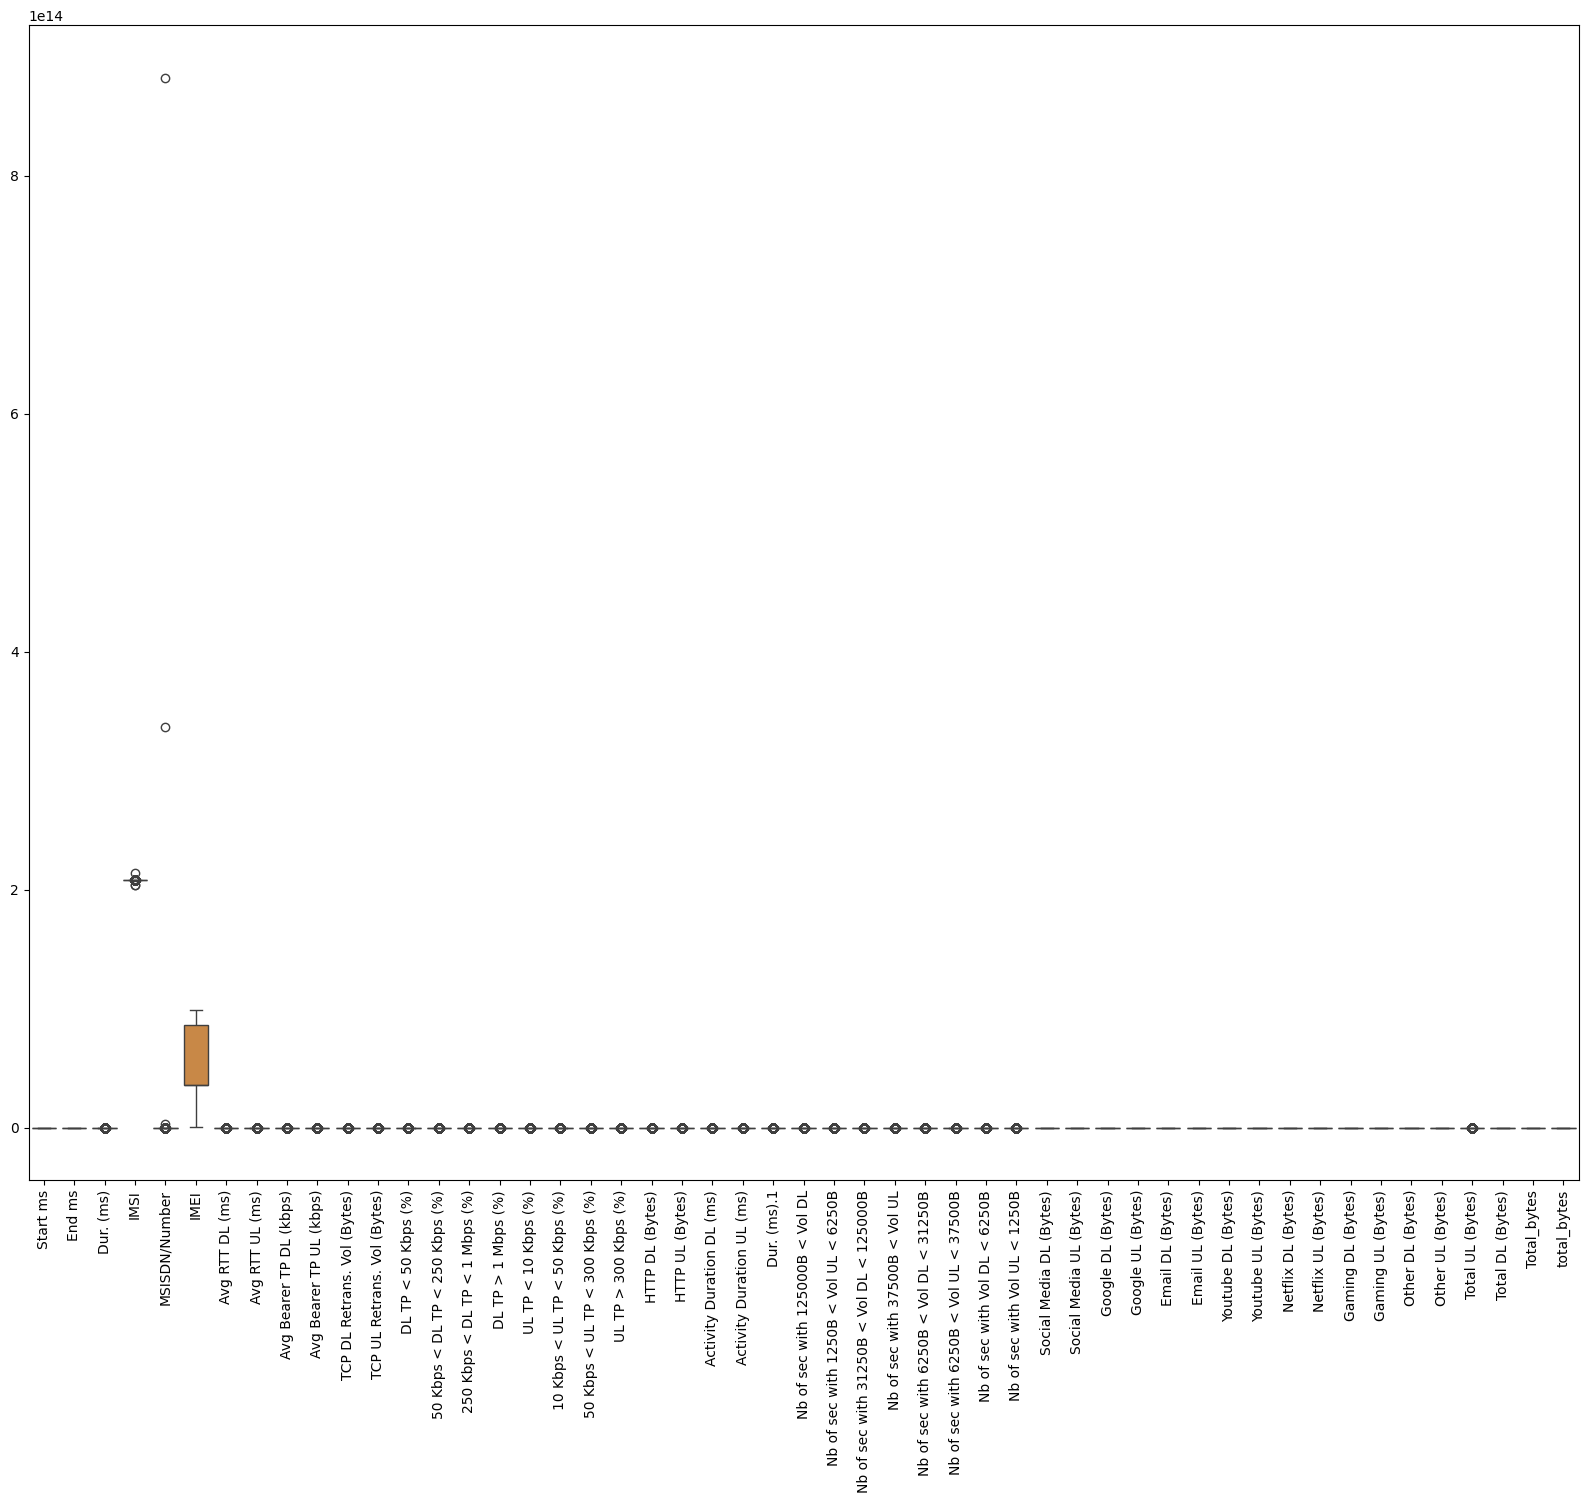

In [108]:
# Boxplots for identifying outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=Telecom_data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

In [110]:
Telecom_data['total_data'] = Telecom_data[['Total DL (Bytes)', 'Total UL (Bytes)']].sum(axis=1)

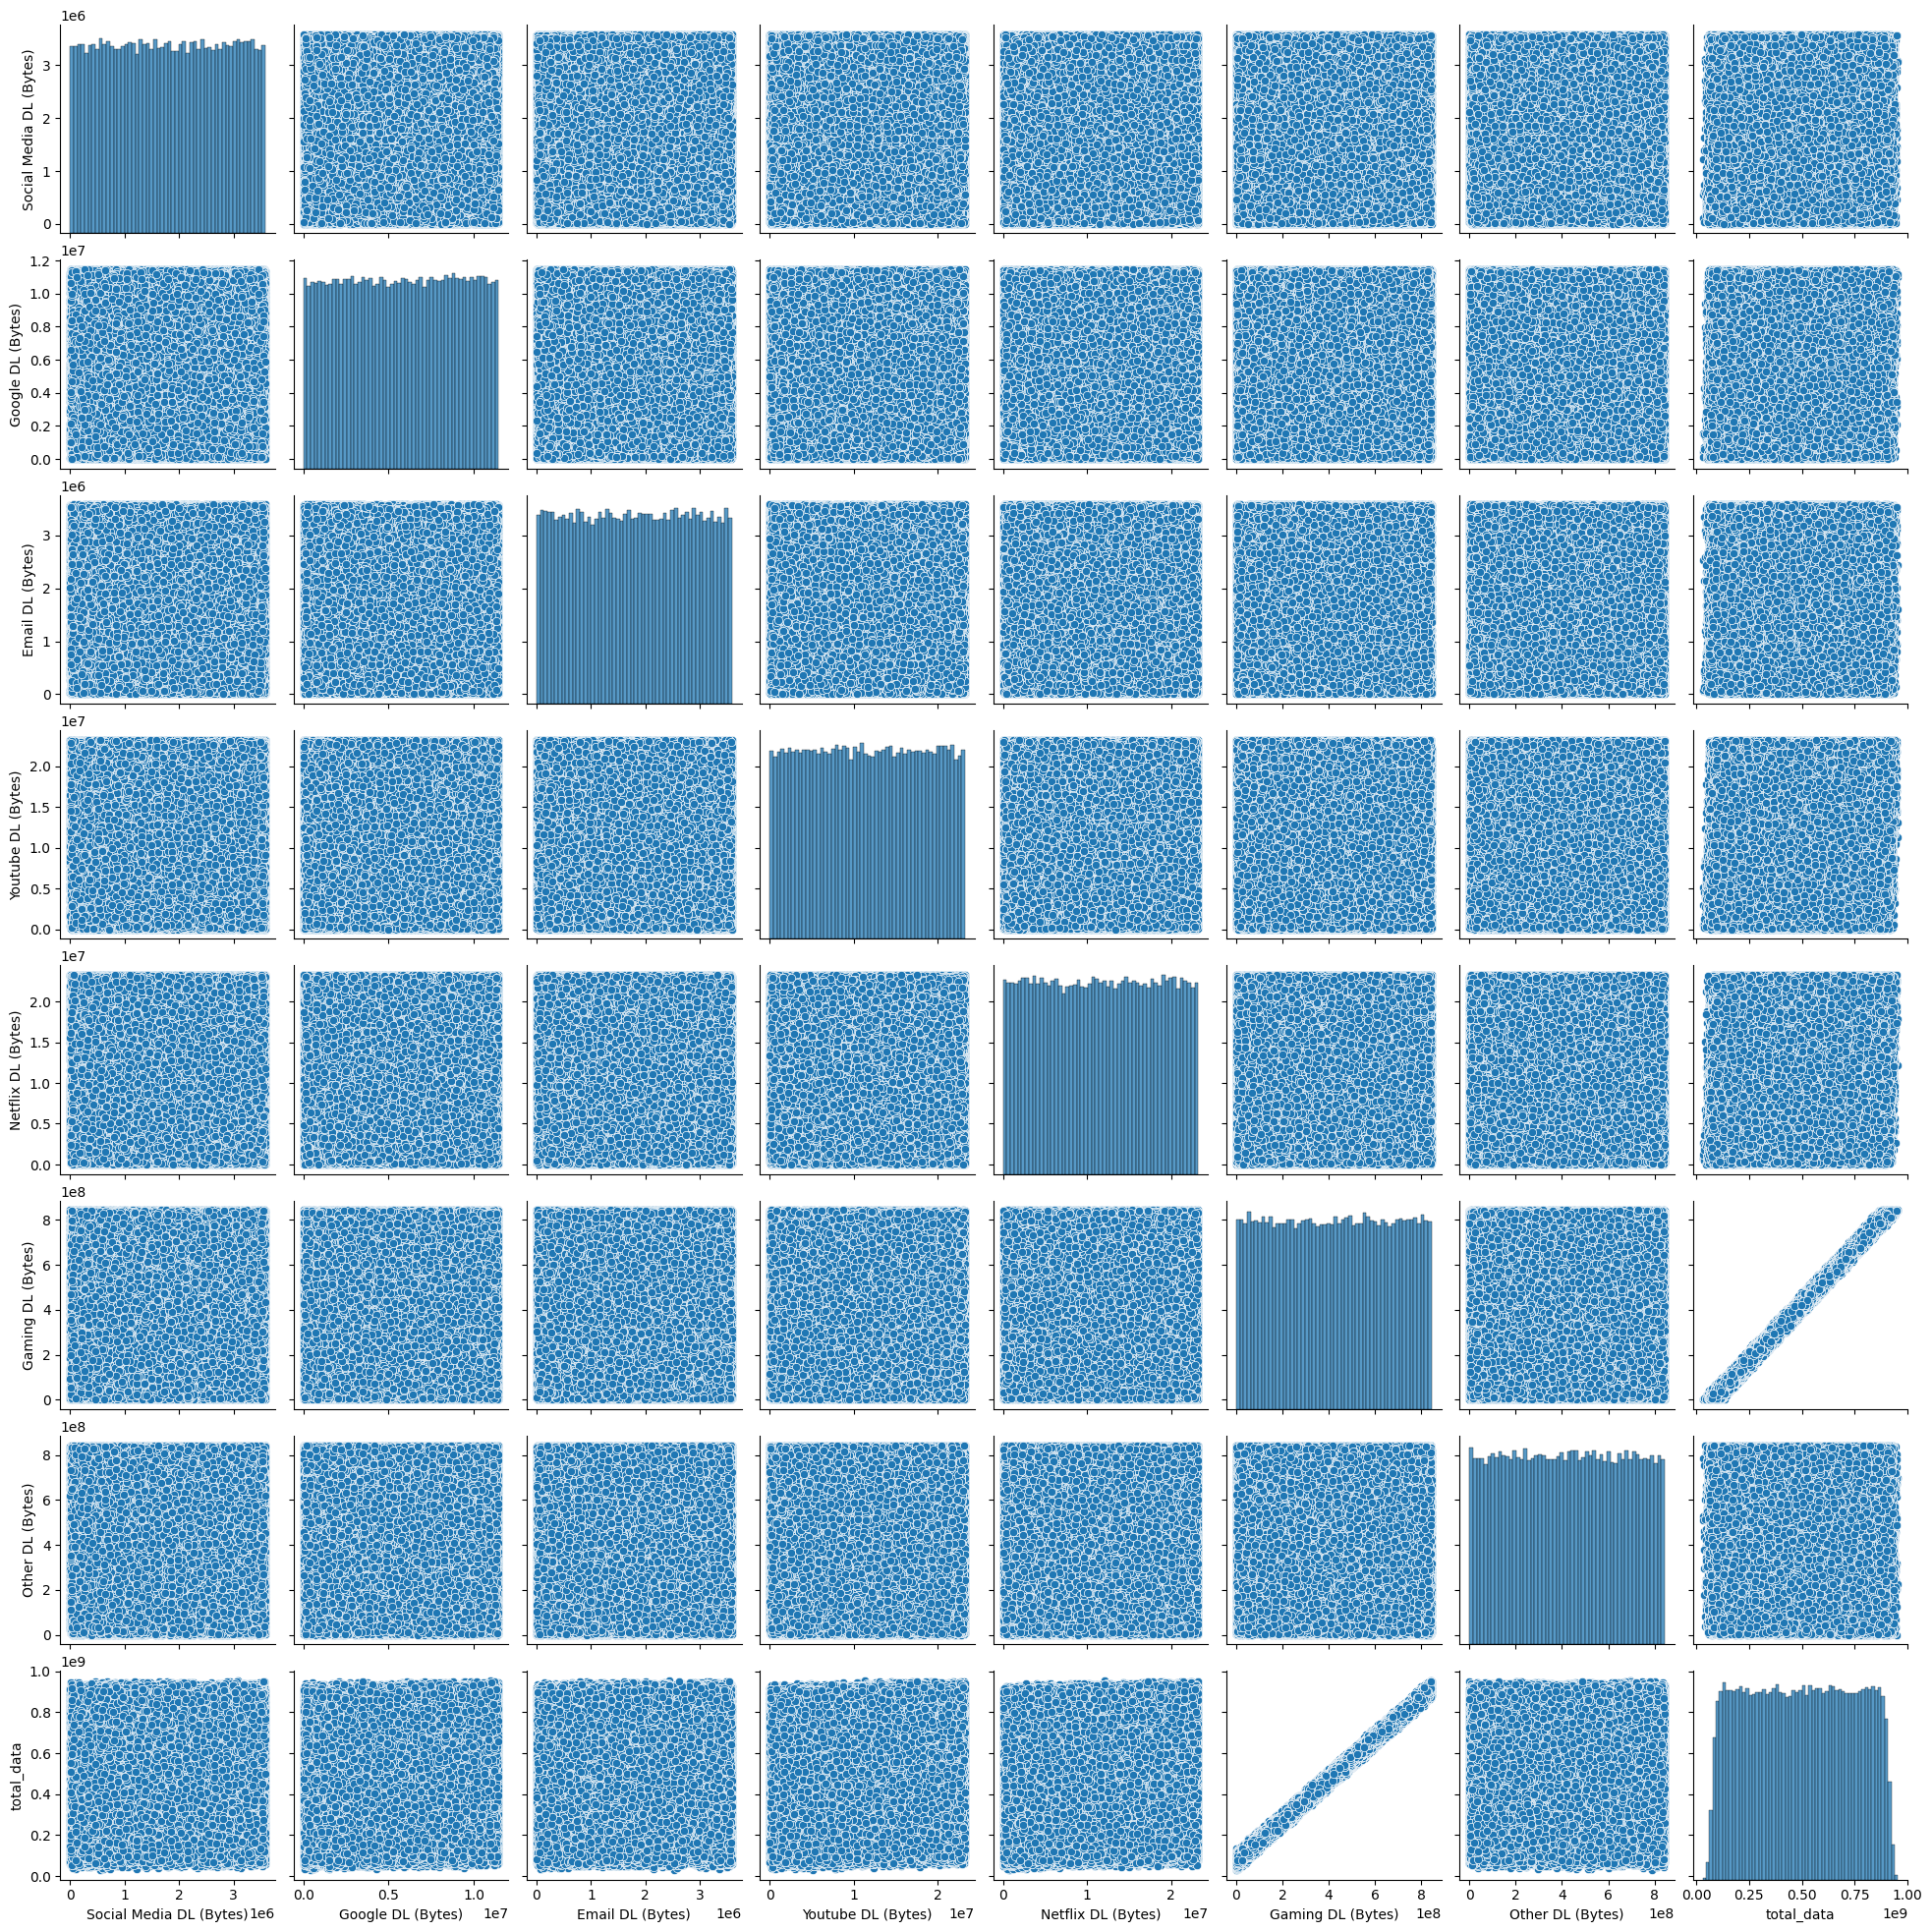

In [112]:
# Pairplot for bivariate analysis
sns.pairplot(Telecom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'total_data']])
plt.show()

In [114]:
Telecom_data['decile_class'] = pd.qcut(Telecom_data['Dur. (ms)'], 5, labels=False)
decile_totals = Telecom_data.groupby('decile_class')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()
decile_totals['total_data'] = decile_totals.sum(axis=1)
print(decile_totals)

              Total DL (Bytes)  Total UL (Bytes)    total_data
decile_class                                                  
0                 1.364976e+13     1234287371672  1.488404e+13
1                 2.165800e+13     1962472030817  2.362047e+13
2                 5.580722e+12      506682183708  6.087404e+12
3                 1.362235e+13     1232586001756  1.485493e+13
4                 1.368615e+13     1232194499175  1.491834e+13


In [118]:
corr_matrix = Telecom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                  'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                  'Other DL (Bytes)']].corr()

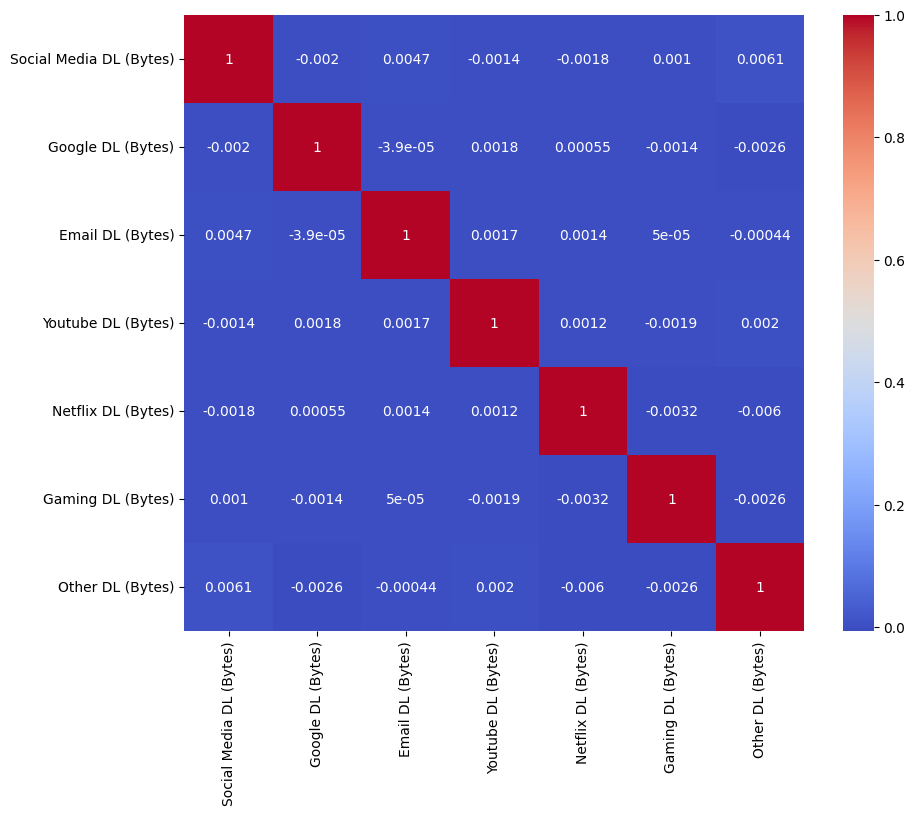

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [124]:
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
x = Telecom_data[features].values
x = StandardScaler().fit_transform(x)

In [126]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

[0.14439453 0.14355429]


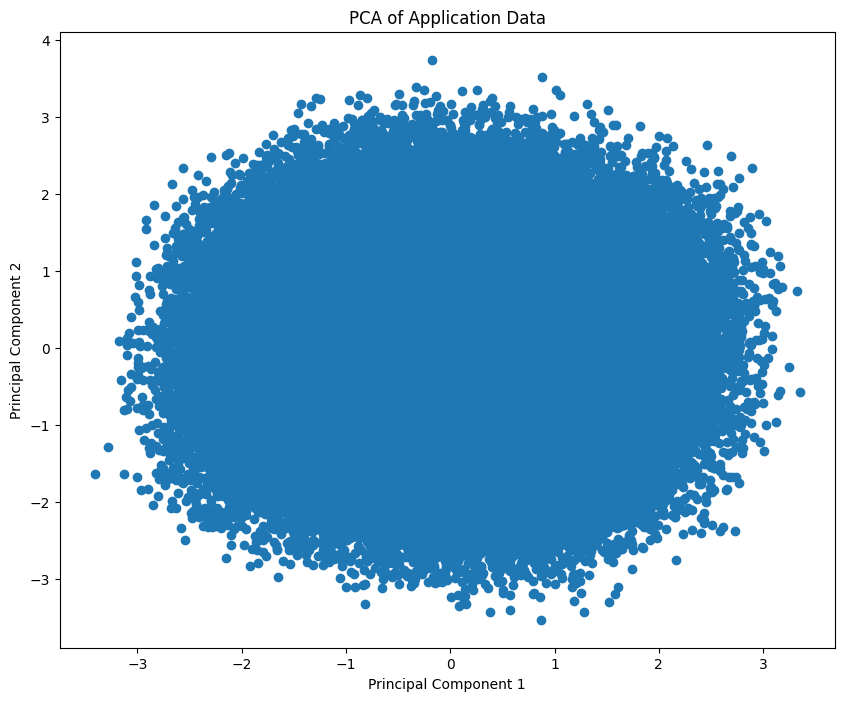

In [128]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Application Data')
plt.show()